In [1]:
from sklearn.cluster import KMeans
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 


In [2]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The above output shows the different species of the Iris flower that we need to Cluster so we can say that the no. of Clusters should be 3 but we will also verify it using the Elbow Method. 

In [8]:

df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Now we will plot the dataset using scatter plot 

Text(0, 0.5, 'SepalLengthCm')

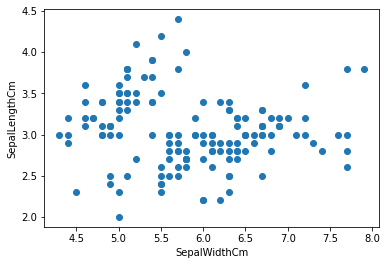

In [249]:
plt.scatter(df.SepalLengthCm,df.SepalWidthCm)
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')


Now checking for outliers in the dataset by using the box plot 

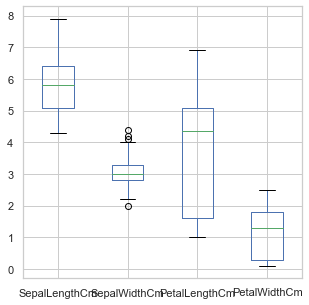

In [32]:
new_data = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

plt.figure(figsize = (5, 5)) 
new_data.boxplot() 

Now we will plot the graphs between the different features SepalLength,SepalWidth ,PetalLength and PetalWidth using pairplot from seaborn library

C:\Users\Vishrut\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


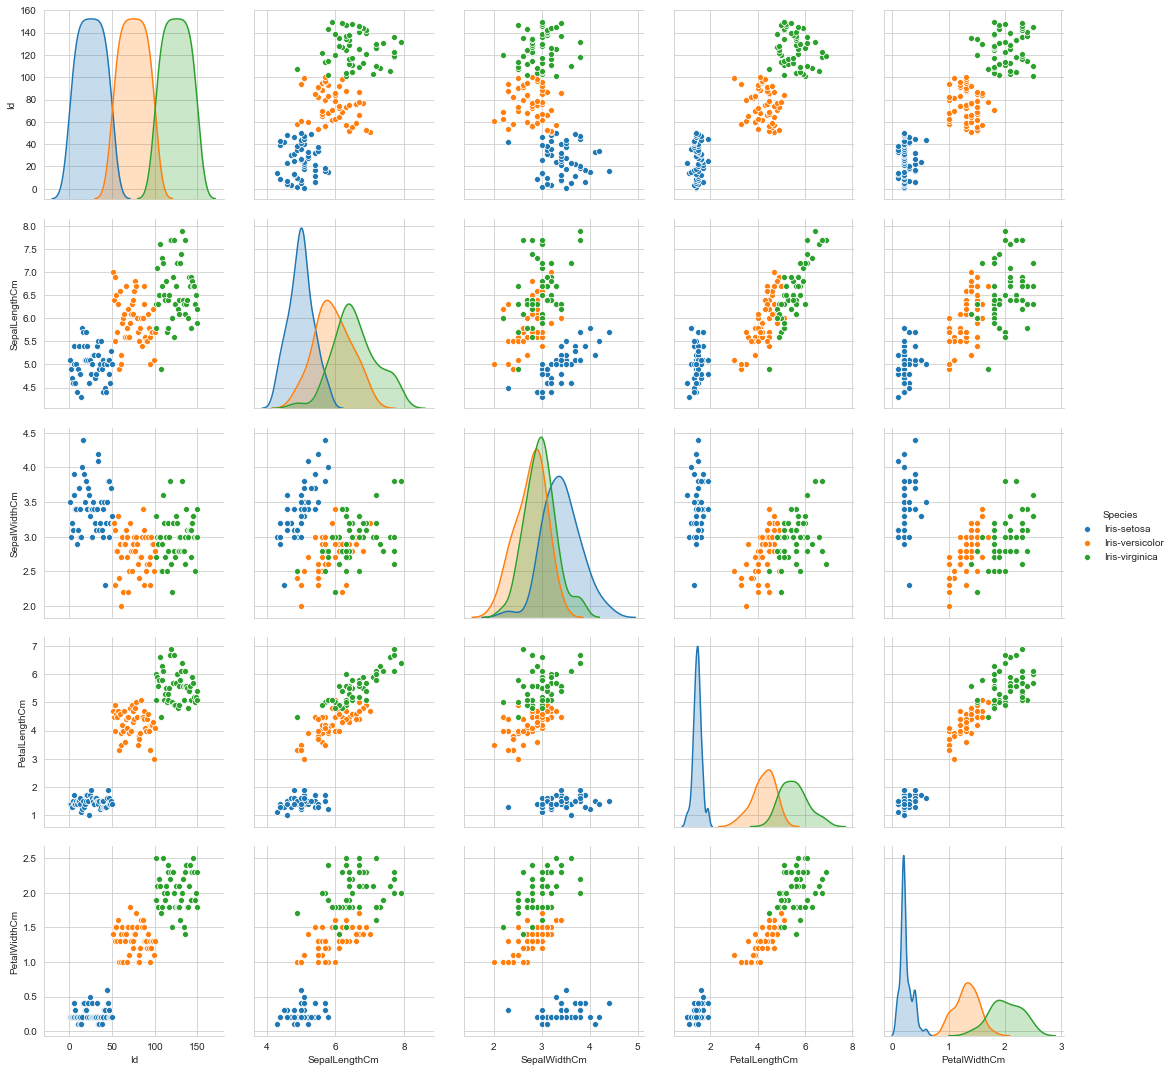

In [4]:

sns.set_style("whitegrid")
sns.pairplot(df,hue='Species',size=3)

Now we will check the errorsum with respect to the no. of clusters and print the output as a list 

In [11]:
x=df.iloc[:,[1,2,3,4]].values 

k_rng=range(1,10)
errorsum=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x)
    errorsum.append(km.inertia_)
errorsum


[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.19698216257427,
 30.001881875582676,
 28.211856755965453]

Now we will plot the graph between **No.of Clusters** and **Error sum**  and find out the required no. of clusters 

Text(0, 0.5, 'Error Sum')

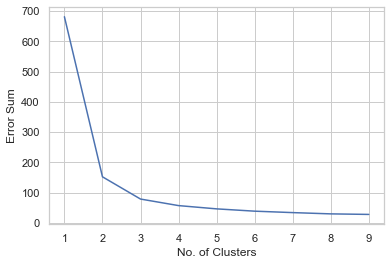

In [12]:
plt.plot(k_rng,errorsum)
plt.xlabel('No. of Clusters',)
plt.ylabel('Error Sum')

Here from the graph we can see that elbow point occurs at **x=3** 
so we choose no. of clusters as **3** 

Now we classify our dataset into Clusters and print the output array

In [235]:
km=KMeans(n_clusters=3)
km.fit(x)
labels=km.predict(x)

labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [276]:
km.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Now we will add the Clusters column in our Dataframe

In [243]:
df['Clusters']=labels
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


From the above Dataframe we find that Iris-versicolor belongs to Cluster 0 , Iris-setosa belongs to Cluster 1 ,Iris-virginica belongs to Cluster 2 however there are also some mixed values for Iris-virginica which belong to Cluster 0 and similarly some values of Iris-versicolor which belong to Cluster 2.Now we plot these Clusters using scatter plot along with the Cluster centroids

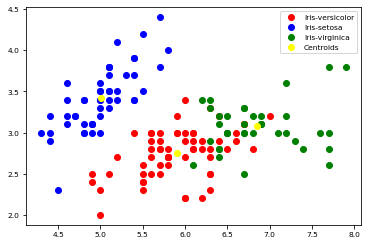

In [301]:
df1=df[labels==0]
df2=df[labels==1]
df3=df[labels==2]
plt.scatter(x[labels==0,0],x[labels==0,1],color='red',label='Iris-versicolor')
plt.scatter(x[labels==1,0],x[labels==1,1],color='blue',label='Iris-setosa')
plt.scatter(x[labels==2,0],x[labels==2,1],color='green',label='Iris-virginica')
plt.scatter(km.cluster_centers_[(0,0)],km.cluster_centers_[0,1],c='yellow',label='Centroids')
plt.scatter(km.cluster_centers_[(1,0)],km.cluster_centers_[1,1],c='yellow',)
plt.scatter(km.cluster_centers_[(2,0)],km.cluster_centers_[2,1],c='yellow',)
plt.rcParams.update({'font.size':7.5})
plt.legend()

This concludes the Clustering of the Iris DataSet 